In [1]:
import geopandas as gpd
import pandas as pd
import folium

In [2]:
info_br = gpd.read_file("bc250_2023_11_23.gpkg", layer = "lml_unidade_federacao_a")

DriverError: 'bc250_2023_11_23.gpkg' not recognized as a supported file format.

In [4]:
info_br.columns

Index(['nome', 'geometriaaproximada', 'sigla', 'geocodigo', 'geometry'], dtype='object')

In [5]:
info_br.head()

,nome,geometriaaproximada,sigla,geocodigo,geometry
0,Alagoas,Não,AL,27,"MULTIPOLYGON (((-36.30191 -10.34226, -36.30001..."
1,Sergipe,Não,SE,28,"MULTIPOLYGON (((-37.63182 -11.52486, -37.63255..."
2,Rio Grande do Norte,Não,RN,24,"MULTIPOLYGON (((-33.81428 -3.87392, -33.81439 ..."
3,Paraíba,Não,PB,25,"MULTIPOLYGON (((-38.45711 -7.71814, -38.46400 ..."
4,Amazonas,Não,AM,13,"MULTIPOLYGON (((-58.14164 -7.34321, -58.13600 ..."


In [6]:
for i in range(info_br.shape[0]):
    print(str(i) + " Estado: " + info_br.nome[i])

0 Estado: Alagoas
1 Estado: Sergipe
2 Estado: Rio Grande do Norte
3 Estado: Paraíba
4 Estado: Amazonas
5 Estado: Amapá
6 Estado: Roraima
7 Estado: Rondônia
8 Estado: Acre
9 Estado: Espírito Santo
10 Estado: São Paulo
11 Estado: Rio de Janeiro
12 Estado: Distrito Federal
13 Estado: Mato Grosso do Sul
14 Estado: Minas Gerais
15 Estado: Paraná
16 Estado: Rio Grande do Sul
17 Estado: Santa Catarina
18 Estado: Piauí
19 Estado: Pará
20 Estado: Goiás
21 Estado: Mato Grosso
22 Estado: Tocantins
23 Estado: Maranhão
24 Estado: Bahia
25 Estado: Ceará
26 Estado: Pernambuco


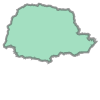

In [7]:
info_br.geometry[15]

In [8]:
df = pd.DataFrame(info_br["sigla"])
df.head()

,sigla
0,AL
1,SE
2,RN
3,PB
4,AM


In [9]:
df = pd.read_excel("https://raw.githubusercontent.com/EduPekUfpr/MNUM-7124/main/Data/Ideb_estados.xlsx")
df.head()

,Sigla,Unidade federativa,Região geográfica,IDEB 2005,IDEB 2007,IDEB 2009,IDEB 2011,IDEB 2013,IDEB 2015
0,AC,Acre,Norte,3.2,3.5,3.5,3.4,3.4,3.6
1,AL,Alagoas,Nordeste,2.8,2.6,3.1,2.9,3.0,3.1
2,AP,Amapá,Norte,2.9,2.8,3.1,3.1,3.0,3.3
3,AM,Amazonas,Norte,2.4,2.9,3.3,3.5,3.2,3.7
4,CE,Ceará,Nordeste,3.3,3.4,3.6,3.7,3.6,3.7


In [10]:
df.columns = ["sigla","UF","Regiao","IDEB2005","IDEB2007","IDEB2009","IDEB2011","IDEB2013","IDEB2015"]
df.head()

,sigla,UF,Regiao,IDEB2005,IDEB2007,IDEB2009,IDEB2011,IDEB2013,IDEB2015
0,AC,Acre,Norte,3.2,3.5,3.5,3.4,3.4,3.6
1,AL,Alagoas,Nordeste,2.8,2.6,3.1,2.9,3.0,3.1
2,AP,Amapá,Norte,2.9,2.8,3.1,3.1,3.0,3.3
3,AM,Amazonas,Norte,2.4,2.9,3.3,3.5,3.2,3.7
4,CE,Ceará,Nordeste,3.3,3.4,3.6,3.7,3.6,3.7


In [ ]:
state_geo = info_br.to_json(drop_id = True)


In [11]:
BR = info_br.merge(df,on="sigla",how="left")
BR.head()

,nome,geometriaaproximada,sigla,geocodigo,geometry,UF,Regiao,IDEB2005,IDEB2007,IDEB2009,IDEB2011,IDEB2013,IDEB2015
0,Alagoas,Não,AL,27,"MULTIPOLYGON (((-36.30191 -10.34226, -36.30001...",Alagoas,Nordeste,2.8,2.6,3.1,2.9,3.0,3.1
1,Sergipe,Não,SE,28,"MULTIPOLYGON (((-37.63182 -11.52486, -37.63255...",Sergipe,Nordeste,3.3,2.9,3.2,3.2,3.2,3.2
2,Rio Grande do Norte,Não,RN,24,"MULTIPOLYGON (((-33.81428 -3.87392, -33.81439 ...",Rio Grande do Norte,Nordeste,2.9,2.9,3.1,3.1,3.1,3.2
3,Rio Grande do Norte,Não,RN,24,"MULTIPOLYGON (((-33.81428 -3.87392, -33.81439 ...",Rondônia,Norte,3.2,3.2,3.7,3.7,3.6,3.6
4,Paraíba,Não,PB,25,"MULTIPOLYGON (((-38.45711 -7.71814, -38.46400 ...",Paraíba,Nordeste,2.6,2.9,3.4,3.3,3.3,3.4


In [ ]:
state_ideb = BR[["sigla","IDEB2015"]]
state_data = BR

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    #data=state_data,
    columns=["state", "IDEB2015"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m